In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [2]:
os.listdir('../../dataset')

['32B475_MLCC_Data.zip',
 'cartoonset10k.tgz',
 'cifar',
 'cifar.tgz',
 'Medical Dataset.xlsx',
 'mnist_png',
 'mushroom-classification.zip',
 'neurosentry',
 'plantdisease',
 'VOC2007',
 'VOCtrainval_11-May-2012']

In [3]:
os.listdir('../../dataset/cifar/cifar')

['labels.txt', 'test', 'train']

In [4]:
train_paths = glob('../../dataset/cifar/cifar/train/*.png')
test_paths = glob('../../dataset/cifar/cifar/test/*.png')

In [5]:
path = train_paths[0]

In [6]:
cls_name = os.path.basename(path).replace('.png', '').split('_')[-1]
cls_name

'frog'

### class 이름 얻은 것을 함수로 묶기

In [7]:
def get_class_name(path):
    fname = os.path.basename(path)
    return fname.replace('.png', '').split('_')[-1]

In [8]:
path, get_class_name(path)

('../../dataset/cifar/cifar/train\\0_frog.png', 'frog')

# Class 수 확인

In [9]:
classes_name = [get_class_name(path) for path in train_paths]

In [10]:
np.unique(classes_name)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [11]:
unique_classes = np.unique(classes_name, return_counts=True)
unique_classes

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

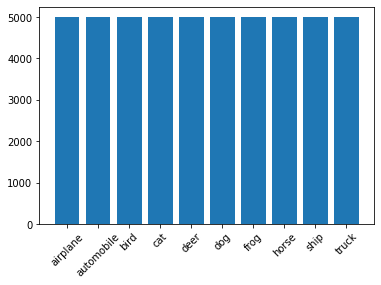

In [12]:
plt.bar(*unique_classes)
plt.xticks(rotation=45)
plt.show()

In [13]:
classes = unique_classes[0]
len(classes), classes

(10, array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'))

# DataFrame 생성

파이썬에서 csv 또는 excel을 다룰 때 사용되는 library  
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다  

### DataFrame 생성 방법

In [14]:
data_ex = {'a':[1, 2, 3], 'b':[10, 20, 30], 'c':[100, 200, 300]}

df_ex = pd.DataFrame(data_ex)
df_ex

a   b    c
0  1  10  100
1  2  20  200
2  3  30  300

In [15]:
data = {'path': train_paths, 'class_name': classes_name}

In [16]:
df = pd.DataFrame(data)
df.head()

path  class_name
0         ../../dataset/cifar/cifar/train\0_frog.png        frog
1  ../../dataset/cifar/cifar/train\10000_automobi...  automobile
2     ../../dataset/cifar/cifar/train\10001_frog.png        frog
3     ../../dataset/cifar/cifar/train\10002_frog.png        frog
4     ../../dataset/cifar/cifar/train\10003_ship.png        ship

## 만들어진 DataFrame 저장

In [17]:
train_csv_path = 'train_dataset.csv'

In [18]:
df.to_csv(train_csv_path, index=False)  

index는 앞에 index가 csv 안에서 앞에 저장이 되지 않도록 하기 위함

![image.png](attachment:image.png)

In [19]:
test_paths[:5]

['../../dataset/cifar/cifar/test\\0_cat.png',
 '../../dataset/cifar/cifar/test\\1000_dog.png',
 '../../dataset/cifar/cifar/test\\1001_airplane.png',
 '../../dataset/cifar/cifar/test\\1002_ship.png',
 '../../dataset/cifar/cifar/test\\1003_deer.png']

In [20]:
test_classes_names = [get_class_name(path) for path in test_paths]
test_classes_names[:5]

['cat', 'dog', 'airplane', 'ship', 'deer']

In [21]:
test_data = {'path': test_paths, 'class_name': test_classes_names}

test_df = pd.DataFrame(test_data)

In [22]:
test_csv_path = 'test_dataset.csv'

In [23]:
test_df.to_csv(test_csv_path, index=False)

## Data 확인

In [24]:
from PIL import Image
from tqdm import tqdm_notebook

In [25]:
heights = []
widths = []

In [26]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

In [27]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))